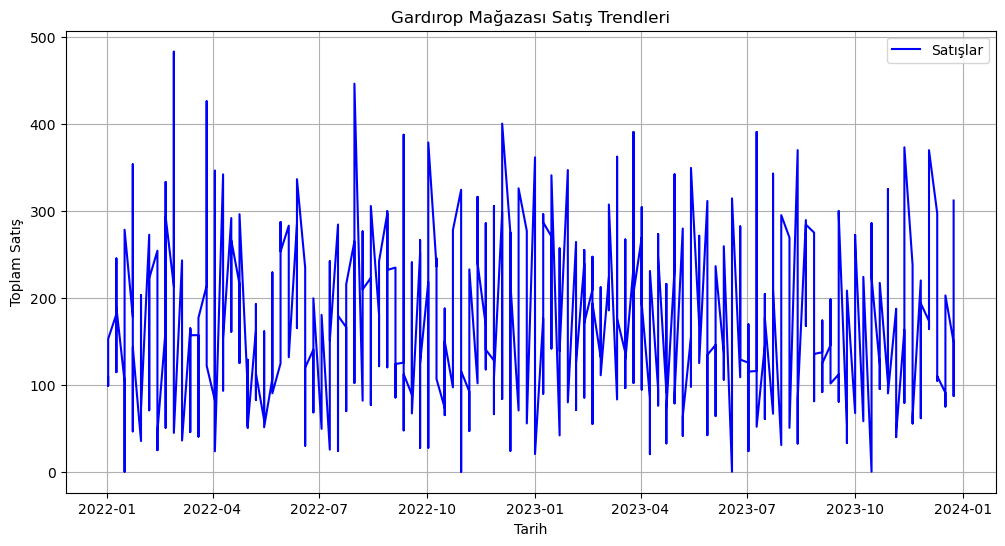

Mean Squared Error: 7330.30


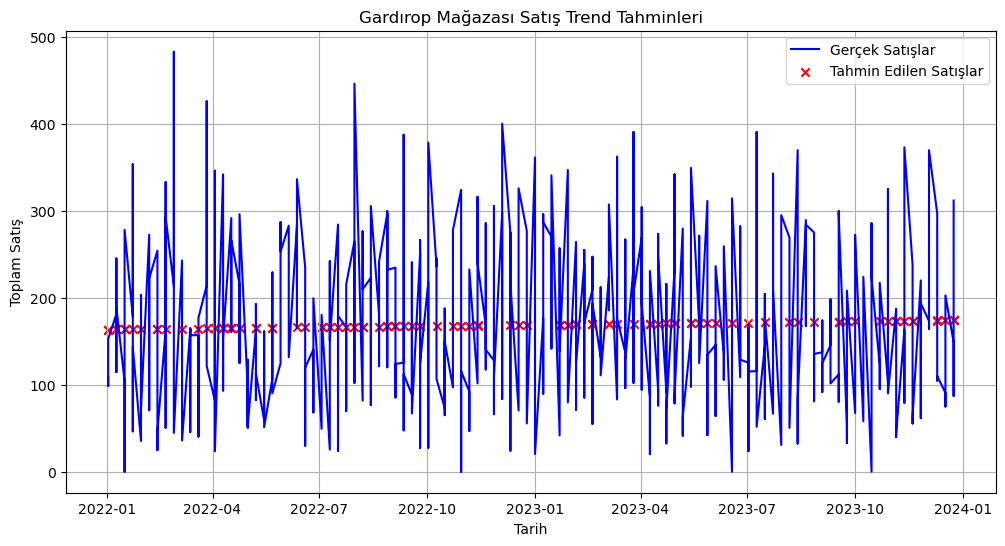

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Bölüm 2: Veri Yükleme ve Hazırlama
def load_and_prepare_data(file_path):
    # Gerçek veri setini CSV dosyasından yükleme
    data = pd.read_csv(file_path, parse_dates=['Date'])
    data = data.sort_values('Date')  # Tarihe göre sıralama
    return data

# Bölüm 3: Veri Keşfi ve Görselleştirme
def explore_and_visualize_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Total Sales'], label='Satışlar', color='blue')
    plt.title('Gardırop Mağazası Satış Trendleri')
    plt.xlabel('Tarih')
    plt.ylabel('Toplam Satış')
    plt.legend()
    plt.grid(True)
    
    # Grafik 1'i kaydetme
    plt.savefig('grafik1.png')
    plt.show()

# Bölüm 4: Trend Analizi ve Tahminleme
def analyze_and_predict(data):
    # Özellik ve hedef değişkenleri ayırma
    X = np.arange(len(data)).reshape(-1, 1)  # Tarihleri sayısal bir formata dönüştürme
    y = data['Total Sales'].values  # Toplam satışları hedef değişken olarak kullanma

    # Veriyi eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Lineer regresyon modeli oluşturma ve eğitme
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Tahmin yapma
    y_pred = model.predict(X_test)

    # Model performansını değerlendirme
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.2f}')

    # Grafik 2: Tahminleri görselleştirme
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Total Sales'], label='Gerçek Satışlar', color='blue')
    plt.scatter(data['Date'][X_test.flatten()], y_pred, label='Tahmin Edilen Satışlar', color='red', marker='x')
    plt.title('Gardırop Mağazası Satış Trend Tahminleri')
    plt.xlabel('Tarih')
    plt.ylabel('Toplam Satış')
    plt.legend()
    plt.grid(True)
    
    # Grafik 2'yi kaydetme
    plt.savefig('grafik2.png')
    plt.show()

# Ana Program
if __name__ == "__main__":
    # CSV dosyasının yolunu belirtin
    file_path = 'sales_data.csv'
    data = load_and_prepare_data(file_path)
    explore_and_visualize_data(data)
    analyze_and_predict(data)
